In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
data = pd.read_csv('results.csv',  names=['test case name', 'platform', 'data set size', 'number of repetitions', 'number of repetitions skipped', 'index of repetition', 'total execution time'])

# Display the first few rows of the dataframe
print(data.head())


  test case name     platform  data set size  number of repetitions  \
0     continents  expressions          10000                     10   
1     continents  expressions          10000                     10   
2     continents  expressions          10000                     10   
3     continents  expressions          10000                     10   
4     continents  expressions          10000                     10   

   number of repetitions skipped  index of repetition  total execution time  
0                              1                   -1              0.109919  
1                              1                    0              0.025450  
2                              1                    1              0.025905  
3                              1                    2              0.025153  
4                              1                    3              0.024491  


In [8]:
# Check data types
print(data.dtypes)

test case name                    object
platform                          object
data set size                      int64
number of repetitions              int64
number of repetitions skipped      int64
index of repetition                int64
total execution time             float64
dtype: object


In [9]:

# Filter out warm up repetitions
data = data[data["index of repetition"] >= 0]

# Calculate the mean and standard deviation of the total execution time for each test case
aggregate_data = data.groupby(['platform', 'data set size']).aggregate(
    mean_execution_time=('total execution time', 'mean'),
    std_deviation=('total execution time', 'std'),
    count=('total execution time', 'count')
).reset_index()

# Check the aggregated data

print(aggregate_data.head())

            platform  data set size  mean_execution_time  std_deviation  count
0        expressions          10000             0.024805       0.000530     10
1        expressions         100000             0.234740       0.001225     10
2        expressions       10000000            23.714141       0.103663     10
3  greatexpectations          10000             0.006810       0.000228     10
4  greatexpectations         100000             0.058817       0.000779     10


/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_33119/2230816065.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(aggregate_data.dataset_label)


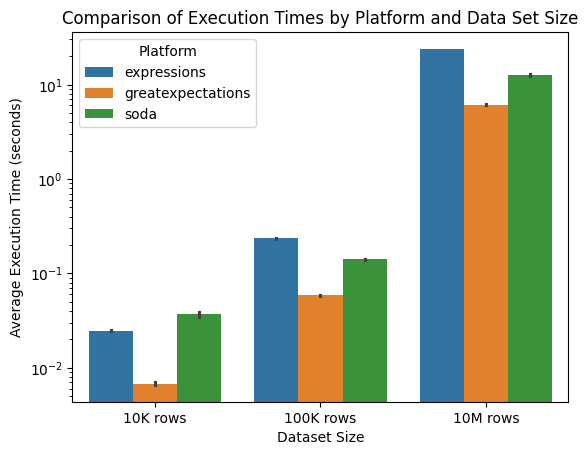

In [10]:


# Create bar plot with 95% confidence intervals

# pretty print the dataset size
def pretty_print_dataset_size(s):
    # convert 1000 to 1K etc.
    return str(s)[::-1].replace('000000', 'M').replace('000', 'K')[::-1] + ' rows'
    
aggregate_data['dataset_label'] = aggregate_data['data set size'].apply(lambda x: pretty_print_dataset_size(x))


# workaround for seaborn not supporting error bars on bar plots
def barplot_err(x, y, xerr=None, yerr=None, data=None, **kwargs):

    _data = []
    for _i in data.index:

        _data_i = pd.concat([data.loc[_i:_i]]*3, ignore_index=True, sort=False)
        _row = data.loc[_i]
        if xerr is not None:
            _data_i[x] = [_row[x]-_row[xerr], _row[x], _row[x]+_row[xerr]]
        if yerr is not None:
            _data_i[y] = [_row[y]-_row[yerr], _row[y], _row[y]+_row[yerr]]
        _data.append(_data_i)

    _data = pd.concat(_data, ignore_index=True, sort=False)

    _ax = sns.barplot(x=x,y=y,data=_data, errorbar=('ci', 95), **kwargs)

    return _ax


# Plot the data
plt.plot(figsize=(10,10))
chart = barplot_err(x="data set size", y="mean_execution_time", yerr="std_deviation", hue="platform", 
 data=aggregate_data, ax=plt.gca())
chart.set_xticklabels(aggregate_data.dataset_label)

plt.yscale('log')
plt.title('Comparison of Execution Times by Platform and Data Set Size')
plt.xlabel('Dataset Size')
plt.ylabel('Average Execution Time (seconds)')
plt.legend(title='Platform')
plt.show()

Finally, summarize the findings in the notebook, highlighting key insights from the visualizations and statistical analysis. You might want to discuss the implications of these findings for choosing a platform based on performance.

This structured approach will help you explore and understand the performance variations among different platforms and test cases, providing a comprehensive analysis that can guide data engineering decisions.